# Описание проекта
- Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


- You work in the `Strimchik` online store, which sells computer games all over the world.


- From open sources, historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available.


 - We need to identify patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns. Here is the data before 2016.
 

- Imagine that now is December 2016, and you are planning a campaign for 2017. We need to work out the principle of working with data. It doesn’t matter if you forecast sales for 2017 according to 2016 or 2027 according to 2026.

- The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, for example, For Adults, For Young Children, or For Adolescents.

Input Description:

- Name - name of the game
 
- Platform - platform

- Year_of_Release - year of release

- Genre - the genre of the game

- NA_sales - Sales in North America (millions of dollars)

- EU_sales - sales in Europe (millions of dollars)

- JP_sales - sales in Japan (millions of dollars)

- Other_sales - sales in other countries (millions of dollars)

- Critic_Score - critical rating (maximum 100)

- User_Score - user rating (maximum 10)

- Rating - rating from the organization ESRB (English Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.





In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

games_df = pd.read_csv('/datasets/games.csv')

print (games_df.info())
games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Всего в таблице 11 колонок и 16714 записей.

Порядок преобразования колонок:

Обработать имена колонок, приведя их к нижнему регистру.
- name - удалить пропуски
- year - перевести в int16, заполнить пропуски
- critic_score - заполнить пропуски
- user_score - заполнить пропуски
- rating - заполнить пропуски
- genre - изменить тип на "category"
- platform - изменить тип на "category"
- rating - изменить тип на "category"




# Шаг 2: предобработка данных


In [2]:
games_df.columns = ['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
games_df.head()


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games_df[games_df['name'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN



删除名称上的空白-如果我们不知道该如何评估哪个游戏和哪个类型？ 年份也是如此-我们的计算基于时间段

Delete gaps in name - if we don’t know which game and which genre how to evaluate? So it is with year - our calculations are based on time periods

In [7]:

games_df.dropna(subset=['name', 'year'], inplace=True)
games_df.reset_index(drop=True, inplace=True)
games_df[games_df['name'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [8]:
games_df['year'] = pd.to_datetime(games_df['year'].astype(int), format='%Y').dt.year.astype('int16')
print (games_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null int16
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    7983 non-null float64
user_score      9839 non-null object
rating          9768 non-null object
dtypes: float64(5), int16(1), object(5)
memory usage: 1.3+ MB
None


Проверяем, есть ли оценка 0 среди пользовательской оценки и оценки критиков

In [9]:
games_df['critic_score'].value_counts().reset_index().query('index == 0.0')

,index,critic_score


In [10]:
games_df['user_score'].value_counts().reset_index().query('index == 0.0')

,index,user_score


окей, нет нулей, думаю можн пропуски заполнить нулями, я думаю так, пока игра не получила оценок ее оценка будет 0

In [11]:
games_df['critic_score'] = games_df['critic_score'].fillna(0.0)
games_df['user_score'] = games_df['user_score'].fillna(0.0)
games_df[games_df['user_score'] == 'tbd']

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0.0,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,0.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


In [12]:
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = 0.0
games_df['user_score'] = games_df['user_score'].astype('float')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null int16
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    16444 non-null float64
user_score      16444 non-null float64
rating          9768 non-null object
dtypes: float64(6), int16(1), object(4)
memory usage: 1.3+ MB


Let's look through the list of all the rating field values

In [13]:
games_df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

ok, checked wiki, wiki gives the following decryption

- “EC” (“Early childhood”) - “For young children”

- "E" ("Everyone") - "For everyone" ("K-A" ("Kids to Adults"))

- “E10 +” (“Everyone 10 and older”) - “For everyone from 10 years old and older”

- “T” (“Teen”) - “Teenagers”

- "M" ("Mature") - "For Adults"

- “AO” (“Adults Only 18+”) - “For adults only”

- “RP” (“Rating Pending”) - “Rating is expected”


Replace the obsolete abbreviation "K-A" with the modern "EC":

In [14]:
games_df.loc[games_df['rating'] == 'K-A', 'rating'] = 'E'
games_df['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
RP         1
AO         1
Name: rating, dtype: int64

In [15]:
games_df.drop(games_df[games_df['rating'] == 'RP'].index, inplace=True)
games_df['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

думаю нет смысла рабоатать с играми чей рейтинг только ожидатеться, думаю их удалить 

In [16]:
games_df.drop(games_df[games_df['rating'] == 'RP'].index, inplace=True)
games_df['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

Заполним пропуски в возрастном рейтинге типом other - чтобы потом можно было легко отбросить эту долю



In [17]:
games_df['rating'] = games_df['rating'].fillna('other')
print (games_df['rating'].value_counts())
print (games_df.info())

other    6676
E        3924
T        2905
M        1536
E10+     1393
EC          8
AO          1
Name: rating, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 11 columns):
name            16443 non-null object
platform        16443 non-null object
year            16443 non-null int16
genre           16443 non-null object
na_sales        16443 non-null float64
eu_sales        16443 non-null float64
jp_sales        16443 non-null float64
other_sales     16443 non-null float64
critic_score    16443 non-null float64
user_score      16443 non-null float64
rating          16443 non-null object
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB
None


с пропусками разобрались, нудно посмаотреть дубликаты 

In [18]:
print (games_df.duplicated().sum(), '\n')
print (games_df['genre'].value_counts(), '\n')
print (games_df['platform'].value_counts())

0 

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         672
Puzzle           569
Name: genre, dtype: int64 

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       956
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


In [19]:
games_df['platform'] = games_df['platform'].astype('category')
games_df['genre'] = games_df['genre'].astype('category')
games_df['rating'] = games_df['rating'].astype('category')
print (games_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 11 columns):
name            16443 non-null object
platform        16443 non-null category
year            16443 non-null int16
genre           16443 non-null category
na_sales        16443 non-null float64
eu_sales        16443 non-null float64
jp_sales        16443 non-null float64
other_sales     16443 non-null float64
critic_score    16443 non-null float64
user_score      16443 non-null float64
rating          16443 non-null category
dtypes: category(3), float64(6), int16(1), object(1)
memory usage: 1.1+ MB
None


# Считаю продажи

In [20]:
games_df['all_sales'] = games_df['other_sales'] + games_df['jp_sales'] + games_df['eu_sales'] + games_df['na_sales']
games_df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,other,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,other,31.38


# 3. Исследовательский анализ данных

In [21]:

games_df['year'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Задача стоит следующая в том чтобы найти определяющий фактор успешности игры. Думаю, данные до 2000 года можно отбросить - эра компьютеров и игр, которые могут влиять вцелом на рейтинг, началась после 2000 года. 


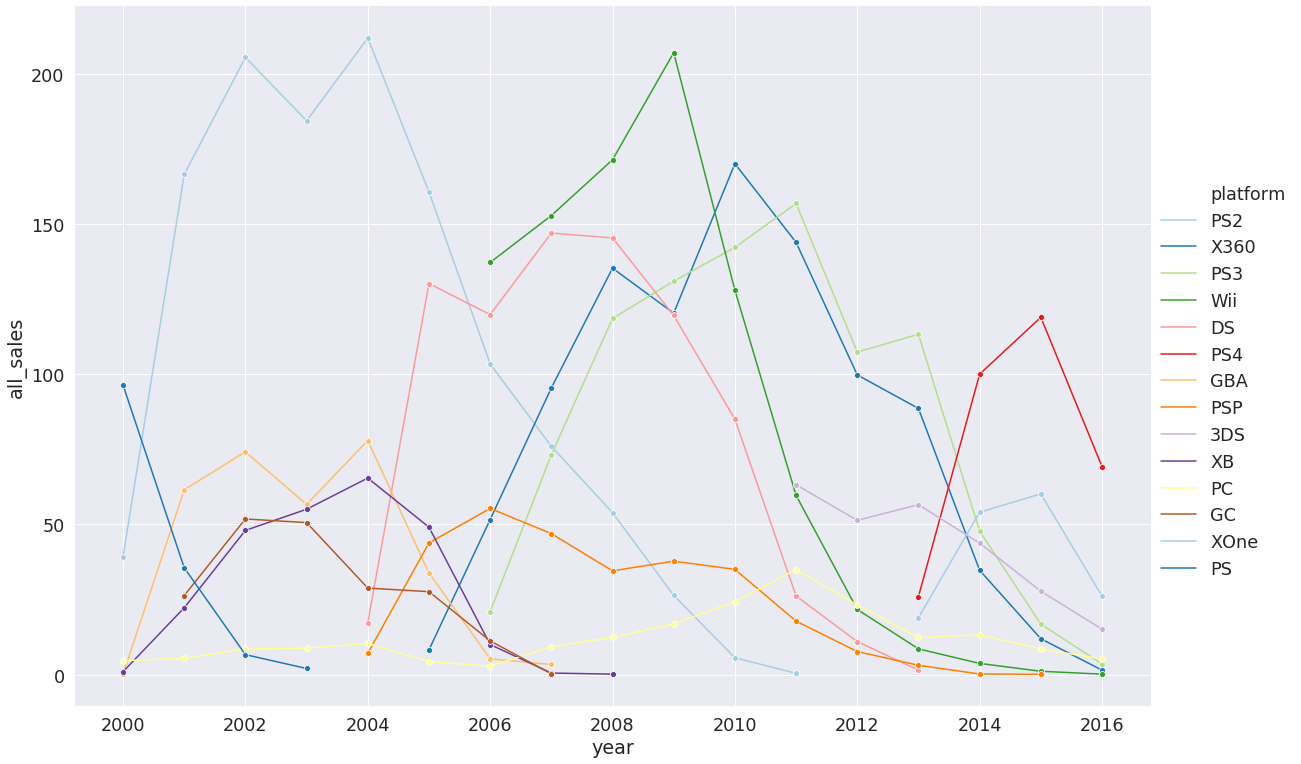

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'XB',
 'PC',
 'GC',
 'XOne',
 'PS']

In [22]:
def print_line_plot_by_year(year, top):
# Construction of a line graph, with a filter by houses and top values
    games_df_filtered = games_df.query('year >= @year')
    games_df_top_sale = pd.pivot_table(games_df_filtered, index=['year', 'platform'], values='all_sales', aggfunc='sum', fill_value=0)
    games_df_top_sale.reset_index(inplace=True)
    
    top_platform = games_df_top_sale.groupby(['platform']).agg(sales=('all_sales', 'sum')).sort_values(by='sales', ascending=False).head(top).index.tolist()
    
    games_df_top_sale = games_df_top_sale.query('platform in @top_platform')
    games_df_top_sale['platform'].cat.remove_unused_categories()
    
    sns.set(font_scale=1.6)
    sns.relplot(
        x='year', 
        y='all_sales', 
        hue='platform', 
        kind="line", 
        marker='o', 
        hue_order=top_platform, 
        palette='Paired', 
        data=games_df_top_sale, 
        height=11, 
        aspect=1.5
    )
    plt.show()

    return top_platform

print_line_plot_by_year(2000, 14)


График показывает, как со временем менялись платформы и пользователи. Например, PS2 была самой популярной платформой до 2005 года, затем продажи резко упали — пришли X360 и PS3. С 2013 года PS4 начала развиваться, но так и не достигла популярности своих предков. В общем, к 2016 году продажи по всем направлениям упали, PS4 вроде еще держится на шаткой ноге. Примечательно, что ПК находится не в ТОП-10, а в ТОП-15 и занимает примерно равные позиции на протяжении всего временного промежутка. Компьютеры всегда были и всегда будут. Прямо как пираты, которые не покупают игры на ПК, а просто скачивают их с торрента.

5 лет - примерно в этот период появляются новые платформы и исчезают старые. То есть, чтобы правильно проанализировать рынок, нужно взять данные с 2011 по 2016 год.

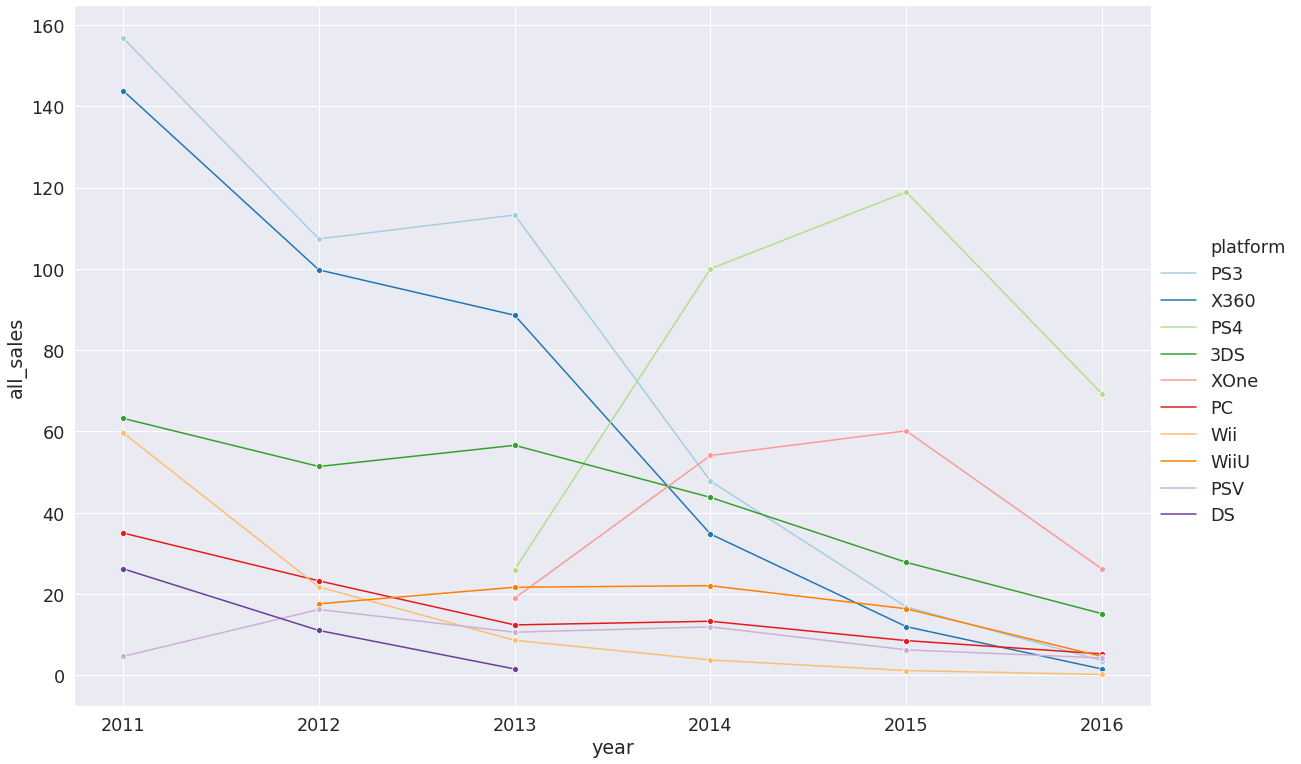

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU', 'PSV', 'DS']

In [23]:
top_platforms = print_line_plot_by_year(2011, 10)
top_platforms


Из графика видно, что максимальные продажи у PS4. Также, если вспомнить исторические данные, то у PS всегда были топовые продажи, которые упали только с выходом новой PS. С 2015 по 2016 год доход от платформы 3DS увеличился. Также у PSP были хорошие продажи, но в 2015 году данные о продажах отсутствовали. Судя по всему, платформа сильно устарела. В принципе, все консоли продаются как горячие пончики. Семейство PS имеет смысл оставить для дальнейшего изучения, семейство XBox, обязательно стабильный ПК, в общем выбираем 10 лучших.


Давайте построим диаграмму объема продаж для этих платформ:


In [24]:
prepared_df = games_df.query('year >= 2011 and platform in @top_platforms')
whisker_plot_df = prepared_df[['year', 'platform', 'all_sales']]
whisker_plot_df

,year,platform,all_sales
16,2013,PS3,21.05
23,2013,X360,16.27
29,2011,X360,14.73
31,2015,PS4,14.63
33,2013,3DS,14.60
...,...,...,...
16432,2016,PSV,0.01
16436,2014,PSV,0.01
16439,2016,PS3,0.01
16441,2016,PSV,0.01


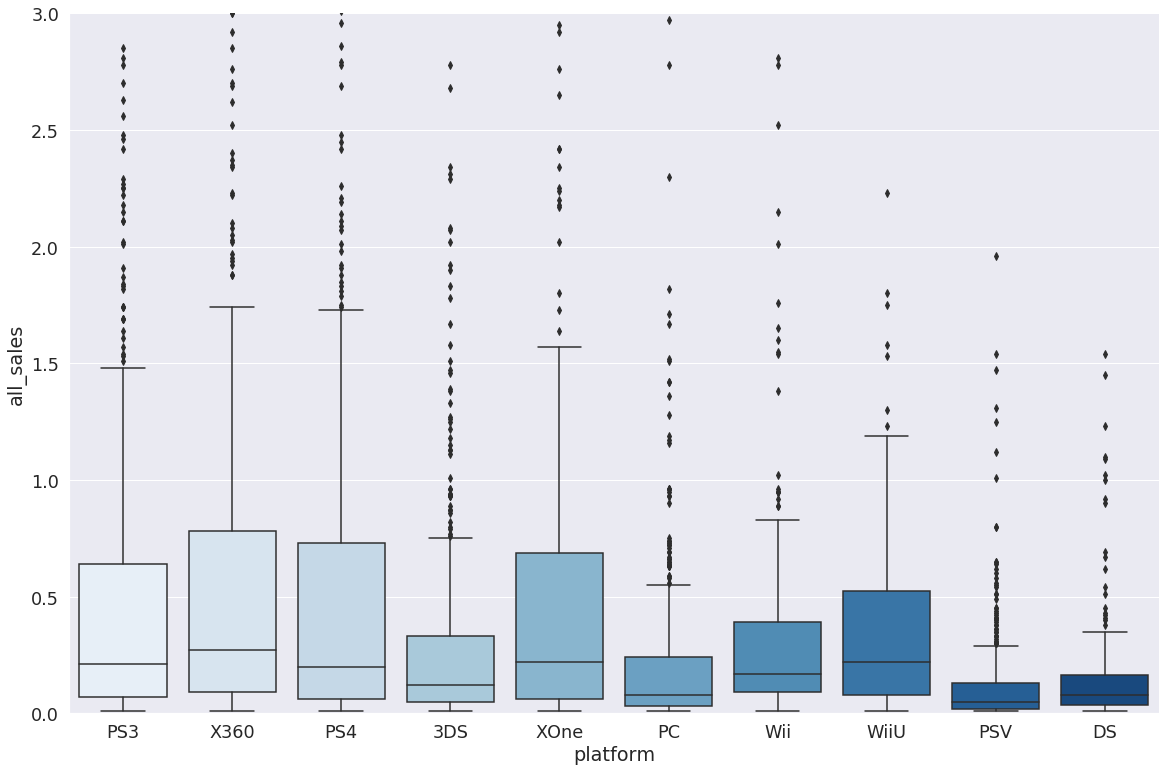

In [25]:
def print_whisker_plot(x_column, y_column, df, order_list, ylim):
    whisker_plot = sns.catplot(
        kind='box',
        y=x_column, 
        x=y_column, 
        palette='Blues', 
        data=df, 
        order=order_list,        
        height=11, 
        aspect=1.5
    )
    whisker_plot.set(ylim=ylim)
    plt.show()
    
print_whisker_plot('all_sales', 'platform', whisker_plot_df, top_platforms, (0, 3))


Мы видим на схеме, что правый ус длиннее максимального, соответственно у каждого из ящиков много выбросов в сторону максимума. Этот график поможет нам установить среднее значение без этих выбросов.


Итак, самые прибыльные платформы: xbox 360, xbox One, PS3-4 и WiiU.


Менее выгодно:

Wii, 3DS, PC, DS, PSV





让我们看看用户评论和评论如何影响一个流行平台内的销售。 为此，构建散点图并计算“ X360”平台的评论与销售之间的相关性

Let's see how user reviews and critics affect sales within one popular platform. To do this, construct a scatter chart and calculate the correlation between reviews and sales for the "X360" platform

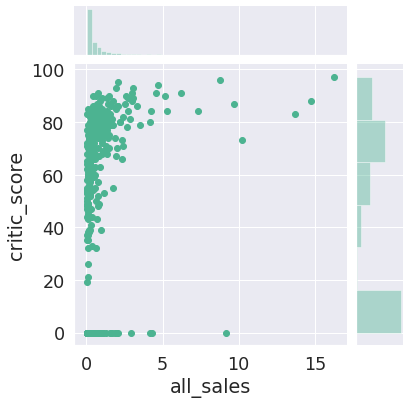

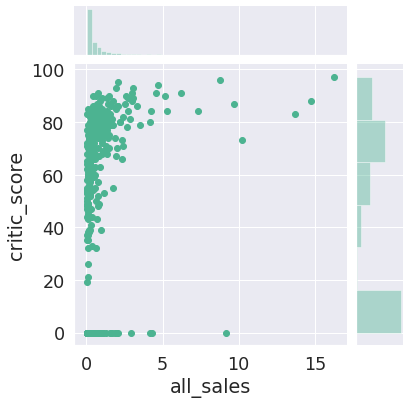

In [26]:
scatter_df = prepared_df.query('platform == "X360"')[['all_sales', 'critic_score', 'user_score']]

def print_scatter_matrix(count_params, df, x = None, y = None):
    if count_params == 1:
        g = sns.jointplot(
            'all_sales', 
            'critic_score', 
            data=df,
            color='#4CB391'
        )
        plt.show()
        
    elif count_params == 2:
        pd.plotting.scatter_matrix(df, figsize=(16, 16))
        plt.show()
        
    else:
        return False

print_scatter_matrix(1, scatter_df, 'all_sales', 'critic_score')
print_scatter_matrix(1, scatter_df, 'all_sales', 'user_score')


According to these graphs, it is clear that there is a dependence of reviews on sales, but not much. Moreover, sales depend on user reviews more than on reviews from critics. But still, the dependence is negligible.


To confirm the assumption, we construct a pairwise dispersion diagram:

根据这些图，很明显，评论对销售的依赖程度很高，但不多。 而且，销售更多地取决于用户评论，而不是评论者的评论。 但是仍然可以忽略不计。


为了确认这一假设，我们构建了成对的色散图：

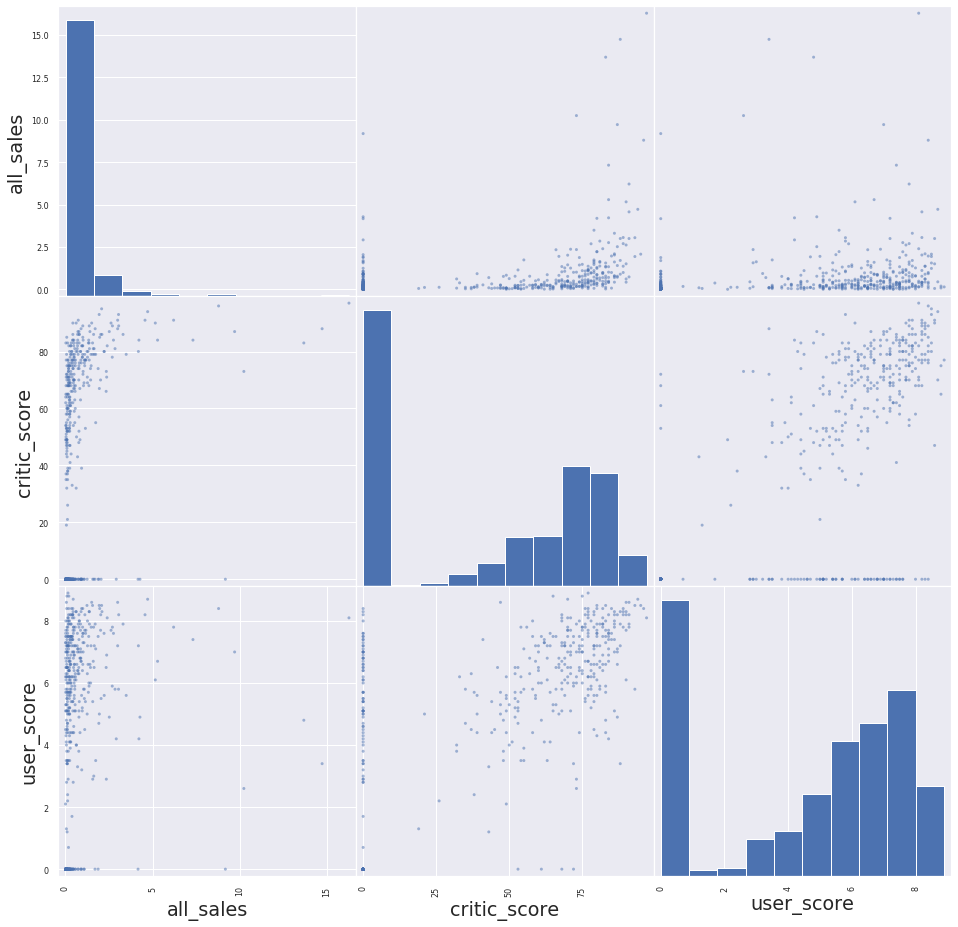

In [27]:
print_scatter_matrix(2, scatter_df)



先前的发现已被总结。 销售数量并不特别取决于用户评级或评论家。 营销人员控制销售。


让我们为其他较不流行的平台构建相同的图形：

Previous findings have been summarized. The number of sales is not particularly dependent on user ratings or critics. Marketers rule sales.


Let's build the same graphics for other less popular platforms:

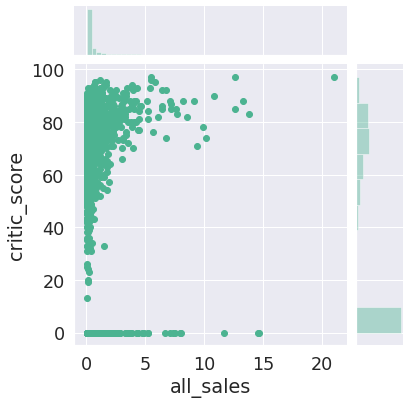

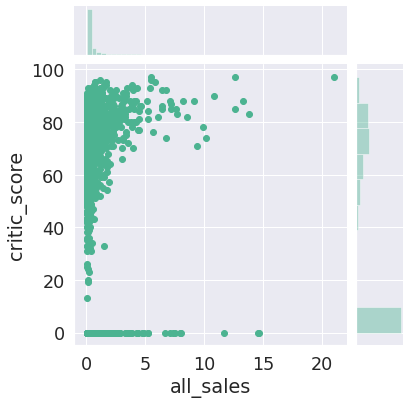

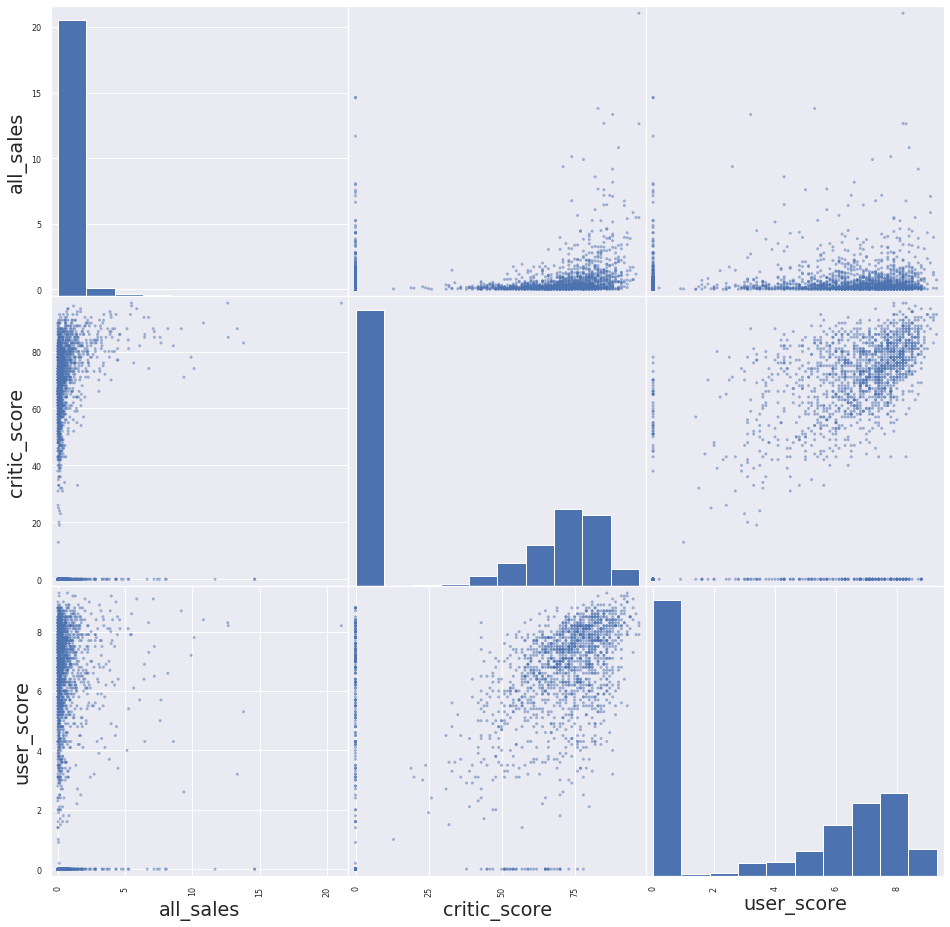

In [28]:
scatter_df = prepared_df.query('platform != "X360"')[['all_sales', 'critic_score', 'user_score']]
print_scatter_matrix(1, scatter_df, 'all_sales', 'critic_score')
print_scatter_matrix(1, scatter_df, 'all_sales', 'user_score')
print_scatter_matrix(2, scatter_df)


On other platforms, the graphics look the same. There is a slight dependency between user_score, critic_score and all_sales. But it does not need to be taken into account.

在其他平台上，图形看起来相同。 user_score，comcritor_score和all_sales之间存在一点依赖性。 但这并不需要加以考虑。

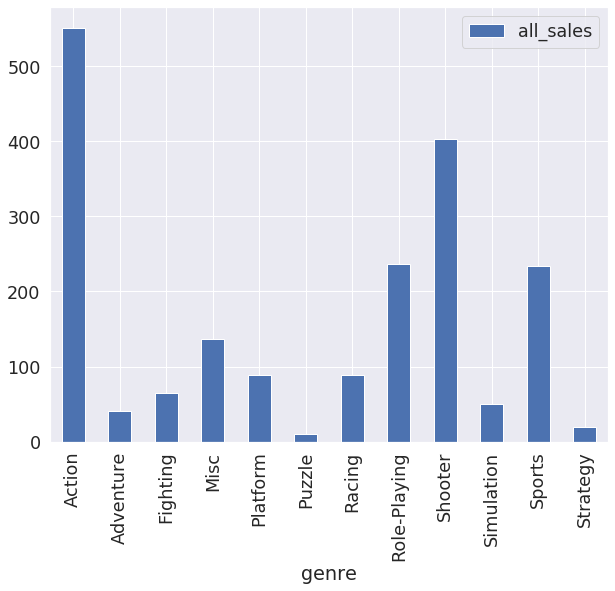

In [29]:
all_sales_by_platform = pd.pivot_table(
        prepared_df, 
        index='genre',
        values=['all_sales'],
        aggfunc='sum'
    )

indexNames = all_sales_by_platform[all_sales_by_platform['all_sales'] <= 0].index
all_sales_by_platform.drop(indexNames , inplace=True)
top_genres = all_sales_by_platform.index
all_sales_by_platform.plot(kind='bar', y='all_sales', figsize=(10, 8))
plt.show()

该图显示最赚钱的类型是动作和射击。 其次是角色扮演和体育。

The graph shows that the most profitable genres are Action and Shooter. In second place are Role-Playing and Sports.



# Step 4. Make a user portrait of each region

In this block, it is necessary for the user of each region (NA, EU, JP):


- Identify the most popular platforms (top 5).

- Describe differences in shares of sales.

- Identify the most popular genres (top 5).

- Explain the difference.

- Answer the question "Does the ESRB rating affect sales in a particular region?"

- We break sales into leaders - in order to understand which game is leading on which platform in which region:


# №4.在每个区域制作一张用户头像
在此块中，对于每个区域（NA，EU，JP）的用户来说都是必要的：


-确定最受欢迎的平台（前5名）。

-描述销售份额的差异。

-确定最受欢迎的类型（前5名）。

-说明差异。

-回答问题“ ESRB评级是否会影响特定地区的销售？”

-我们将销售分成领导者-为了了解哪个游戏在哪个地区的哪个平台上处于领先地位：

In [30]:
def get_leader_region(row):   
    na_sales = row[4]
    eu_sales = row[5]
    jp_sales = row[6]
    
    if eu_sales < na_sales > jp_sales:
        return 'na'
    elif na_sales < eu_sales > jp_sales:
        return 'eu'
    return 'jp'

prepared_df['leader_region'] = prepared_df.agg(get_leader_region, axis=1)
prepared_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,leader_region
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,eu
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,na
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73,na
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,other,14.63,na
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,other,14.60,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,other,0.01,jp
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,other,0.01,jp
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,other,0.01,jp
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,other,0.01,jp


# Посмотрим разницу в продажах по платформам

# 让我们来看看不同平台的销售额差异

# Let's see the difference in sales by platform

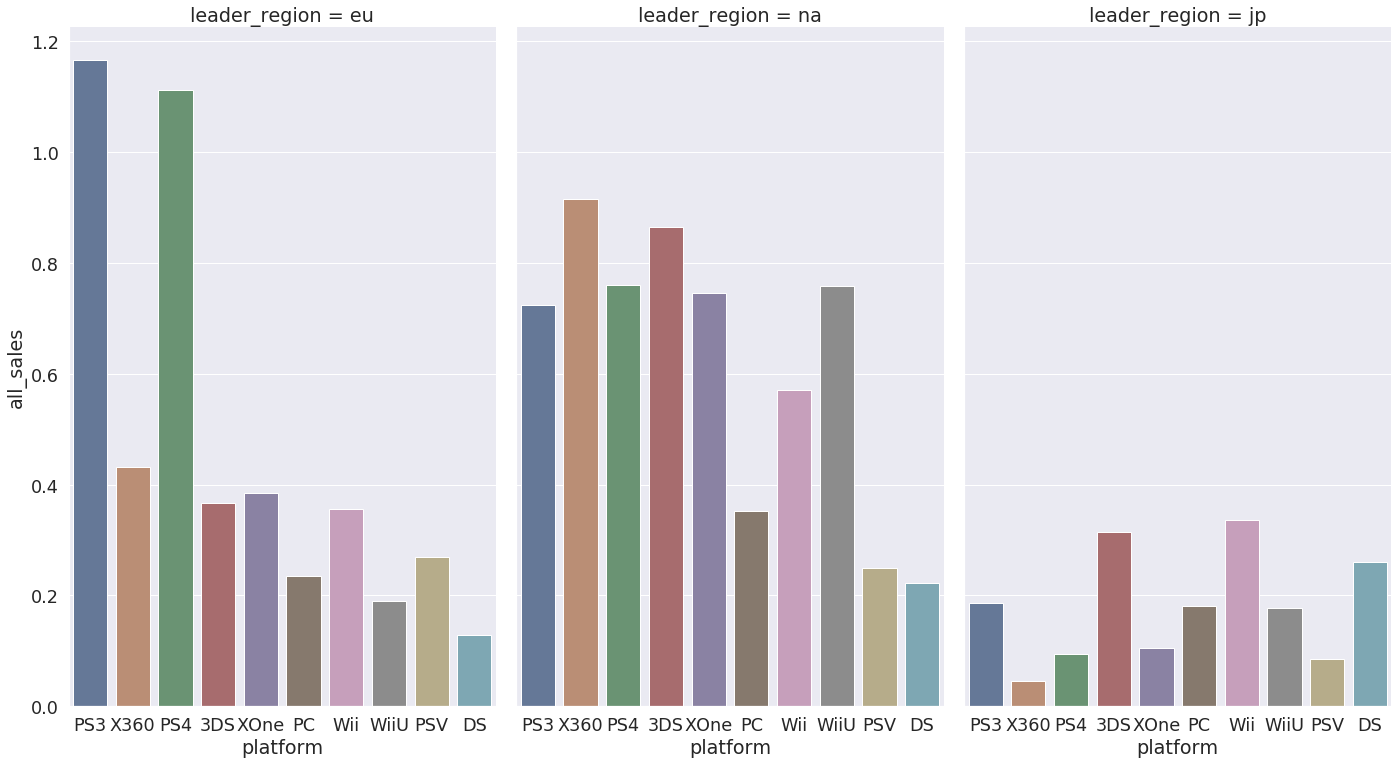

In [31]:
def print_barplot_by_region(df, x, y, category, height, order=None, rotate=False):
    """  """
    g = sns.catplot(
        x=x, 
        y=y, 
        col=category,
        data=df, 
        saturation=.5,
        kind="bar", 
        ci=None, 
        aspect=.6,
        order=order,
        height=height
    )
    if rotate == True:
        [plt.setp(
            ax.get_xticklabels(), 
            rotation=45,
            horizontalalignment='right',
            fontweight='light',
            fontsize='x-large'
        ) for ax in g.axes.flat]
    plt.show()
    
print_barplot_by_region(prepared_df, 'platform', 'all_sales', 'leader_region', 11, top_platforms)



# Let's see the difference in sales by game genres

# 让我们看一下游戏类型的销售额差异

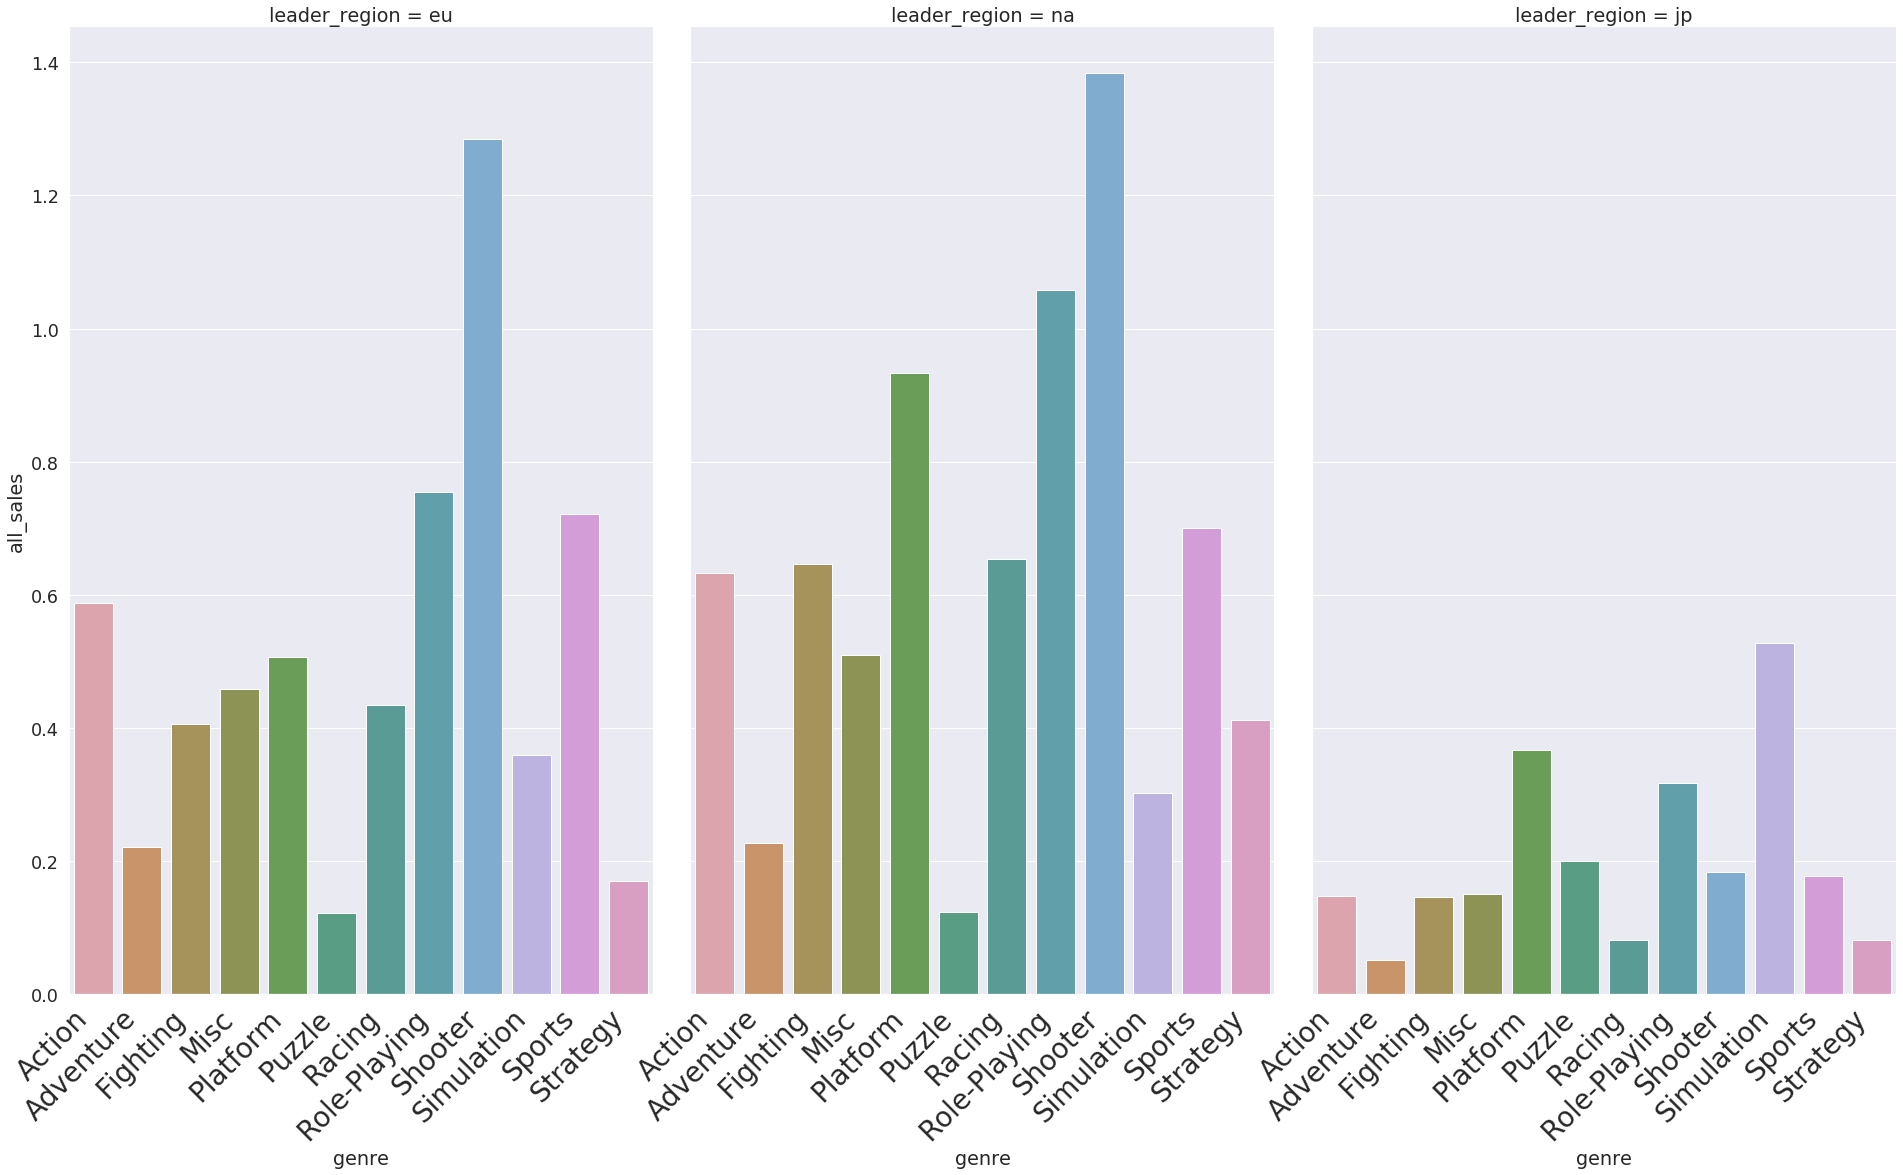

In [32]:
print_barplot_by_region(prepared_df, 'genre', 'all_sales', 'leader_region', 15, None, True)

另外，请参阅销售数据透视表中的常规信息。

Also, see the general information in the sales pivot table.


In [33]:
pivot_by_region = pd.pivot_table(
    prepared_df,
    index=['leader_region', 'platform'],
    values=['all_sales'],
    aggfunc=['sum']
)

pivot_by_region.reset_index(inplace=True)
pivot_by_region.columns=['leader_region', 'platform', 'all_sales']
pivot_by_region.sort_values(by=['leader_region', 'all_sales'], ascending=False, inplace=True)
pivot_by_region

,leader_region,platform,all_sales
28,na,X360,338.59
23,na,PS3,181.03
20,na,3DS,146.20
29,na,XOne,137.95
24,na,PS4,80.57
27,na,WiiU,72.81
26,na,Wii,67.43
22,na,PC,21.88
21,na,DS,21.07
25,na,PSV,11.70


Let's see if the ESRB rating depends on the number of sales in each region.

让我们看看ESRB等级是否取决于每个地区的销售数量。

In [34]:

scatter_df_na = prepared_df.query('leader_region == "na"')[['rating', 'all_sales']]
scatter_df_eu = prepared_df.query('leader_region == "eu"')[['rating', 'all_sales']]
scatter_df_jp = prepared_df.query('leader_region == "jp"')[['rating', 'all_sales']]
scatter_df_na['rating_code'] = scatter_df_na.query('rating != "other"')['rating'].cat.codes
scatter_df_eu['rating_code'] = scatter_df_eu.query('rating != "other"')['rating'].cat.codes
scatter_df_jp['rating_code'] = scatter_df_jp.query('rating != "other"')['rating'].cat.codes

print (f'欧洲: \n{scatter_df_eu.corr()}\n')
print (f'北美: \n{scatter_df_na.corr()}\n')
print (f'日本: \n{scatter_df_jp.corr()}')

欧洲: 
             all_sales  rating_code
all_sales     1.000000     0.074912
rating_code   0.074912     1.000000

北美: 
             all_sales  rating_code
all_sales     1.000000     0.025372
rating_code   0.025372     1.000000

日本: 
             all_sales  rating_code
all_sales     1.000000    -0.190642
rating_code  -0.190642     1.000000


In [35]:

scatter_df_na = prepared_df.query('leader_region == "na"')[['rating', 'all_sales']]
scatter_df_eu = prepared_df.query('leader_region == "eu"')[['rating', 'all_sales']]
scatter_df_jp = prepared_df.query('leader_region == "jp"')[['rating', 'all_sales']]
scatter_df_na['rating_code'] = scatter_df_na.query('rating != "other"')['rating'].cat.codes
scatter_df_eu['rating_code'] = scatter_df_eu.query('rating != "other"')['rating'].cat.codes
scatter_df_jp['rating_code'] = scatter_df_jp.query('rating != "other"')['rating'].cat.codes

print (f'Europe: \n{scatter_df_eu.corr()}\n')
print (f'North America: \n{scatter_df_na.corr()}\n')
print (f'Japan: \n{scatter_df_jp.corr()}')

Europe: 
             all_sales  rating_code
all_sales     1.000000     0.074912
rating_code   0.074912     1.000000

North America: 
             all_sales  rating_code
all_sales     1.000000     0.025372
rating_code   0.025372     1.000000

Japan: 
             all_sales  rating_code
all_sales     1.000000    -0.190642
rating_code  -0.190642     1.000000


From the correlation tables it can be seen that there is a slight influence of sales on the rating only in Japan. Europe has less influence, and America has even less.


According to the results of a data study, the following picture


# Europe
Platform Preferences:

PS4 (225.76 million)
PS3 (213.53 million)
Preferences by genre:

Shooter
Role-playing
Sports
Action
Does ESRB Rating Affect Sales?

Almost no effect

# North America
Platform Preferences:

X360 (338.59 million)
PS3 (181.03 million)
3DS (146.20 million)
XOne (137.95 million)
Preferences by genre:

Shooter
Role-playing
Platform
Action
Does ESRB Rating Affect Sales?

Does not affect

# Japan
Platform Preferences:

3DS (86.32 million)
PS3 (51.01 million)
DS (12.24)
PSV (28.35)
Wii (8.73 million)
Preferences by genre:

Simulation
Platform
Role-playing
Does ESRB Rating Affect Sales?

Slightly affects
It is interesting that in Japan, some platforms are popular, and a little others bring revenue.

General sales by region

从相关表中可以看出，仅在日本销售对评级有轻微影响。欧洲的影响较小，而美国的影响较小。


根据数据研究的结果，形成了下图

# 欧洲
平台首选项：

PS4（2.2576亿）
PS3（2.1353亿）
按类型的偏好：

射手
角色扮演
体育运动
动作片
ESRB评级会影响销售吗？

几乎没有效果

# 北美
平台首选项：

X360（3.3859亿）
PS3（1.8303亿）
3DS（1.4620亿）
XOne（1.3795亿）
按类型的偏好：

射手
角色扮演
平台平台
动作片
ESRB评级会影响销售吗？

不影响

# 日本
平台首选项：

3DS（8632万）
PS3（5101万）
DS（12.24）
PSV（28.35）
Wii（873万）
按类型的偏好：

模拟
平台平台
角色扮演
ESRB评级会影响销售吗？

轻微影响
有趣的是，在日本，某些平台很受欢迎，而另一些则带来了收入。

各地区总销售额

In [36]:
def get_all_sales_by_region(df, region):
    return df.query('leader_region == @region')['all_sales'].sum()

print (f'Всего продаж в Северной Америке: {get_all_sales_by_region(pivot_by_region, "na"):.2f}')
print (f'Всего продаж в Европе: {get_all_sales_by_region(pivot_by_region, "eu"):.2f}')
print (f'Всего продаж в Японии: {get_all_sales_by_region(pivot_by_region, "jp"):.2f}')

Всего продаж в Северной Америке: 1079.23
Всего продаж в Европе: 641.57
Всего продаж в Японии: 203.81


In [43]:
def get_all_sales_by_region(df, region):
    return df.query('leader_region == @region')['all_sales'].sum()

print (f'北美总销售额：: {get_all_sales_by_region(pivot_by_region, "na"):.2f}')
print (f'欧洲总销售额: {get_all_sales_by_region(pivot_by_region, "eu"):.2f}')
print (f'在日本的总销量: {get_all_sales_by_region(pivot_by_region, "jp"):.2f}')

北美总销售额：: 1079.23
欧洲总销售额: 641.57
在日本的总销量: 203.81


In [44]:
def get_all_sales_by_region(df, region):
    return df.query('leader_region == @region')['all_sales'].sum()

print (f'Total sales in North America: {get_all_sales_by_region(pivot_by_region, "na"):.2f}')
print (f'Total sales in Europe: {get_all_sales_by_region(pivot_by_region, "eu"):.2f}')
print (f'Total sales in Japan: {get_all_sales_by_region(pivot_by_region, "jp"):.2f}')

Total sales in North America: 1079.23
Total sales in Europe: 641.57
Total sales in Japan: 203.81


# №5.检验假设
有必要检验两个假设：


- Xbox One和PC平台的平均用户评分相同。

- “动作”（英语“ action”）和“体育”（英语“ sports”）类型的平均用户评分不同。

为了检验假设，我们将使用独立检验，该检验检查两个总体的平均值是否相等。零假设-参数相等，或者-参数不同。使用stats库的_ttestind（）方法执行验证。我们将比较获得的p值与alpha（按标准将其设置为.05）

假设1：

- 原假设：
- - Xbox One和PC平台的平均用户评分是相同的。
- 替代假设：
- - Xbox One和PC平台的平均用户评分有所不同。

# Step 5. Testing hypotheses
It is necessary to test 2 hypotheses:


- The average user ratings for the Xbox One and PC platforms are the same.

- The average user ratings of the genres Action (English “action”) and Sports (English “sports”) are different.

To test hypotheses, we will use the indie test, which checks the equality of the average of two populations. The null hypothesis - the parameters are equal, the alternative - the parameters differ. Validation is performed using the _ttestind () method of the stats library. we will compare the obtained p-value with alpha, which by the standard will be set as .05

Hypothesis 1:

- The null hypothesis:
- - The average user ratings for the Xbox One and PC platforms are the same.
- Alternative hypothesis:
- - Average user ratings for Xbox One and PC platforms vary.

In [39]:
alpha = .05

results = st.ttest_ind(
    prepared_df.query('platform == "XOne"')['user_score'],
    prepared_df.query('platform == "PC"')['user_score'],
)

print ('p值:', results.pvalue)

if results.pvalue < alpha:
    print ('\n拒绝假设')
else:
    print ('\n假设检验')

p值: 0.25540980036075356

假设检验


In [40]:
alpha = .05

results = st.ttest_ind(
    prepared_df.query('platform == "XOne"')['user_score'],
    prepared_df.query('platform == "PC"')['user_score'],
)

print ('p value:', results.pvalue)

if results.pvalue < alpha:
    print ('\nReject the hypothesis.')
else:
    print ('\nHypothesis tested.')

p value: 0.25540980036075356

Hypothesis tested.



# Hypothesis 2:
- The null hypothesis:
- - The average user ratings for the Action and Sports genres are the same.
- Alternative hypothesis:
- -The average user ratings for the Action and Sports genres are different.


In [41]:
results = st.ttest_ind(
    prepared_df.query('genre == "Action"')['user_score'],
    prepared_df.query('genre == "Sports"')['user_score'],
)

print ('p值:', results.pvalue)

if results.pvalue < alpha:
    print ('\n拒绝假设')
else:
    print ('\n假设检验')

p值: 0.893200474053962

假设检验


In [42]:
results = st.ttest_ind(
    prepared_df.query('genre == "Action"')['user_score'],
    prepared_df.query('genre == "Sports"')['user_score'],
)

print ('p value:', results.pvalue)

if results.pvalue < alpha:
    print ('\nReject the hypothesis.')
else:
    print ('\nHypothesis tested.')

p value: 0.893200474053962

Hypothesis tested.



Total:

The average user ratings for the Xbox One and PC platforms are the same.
The average user ratings for the genres Action (English “action”) and Sports (English “sports”) are the same - and judging by how p-value tends to 1, the average ratings are very similar.


# Общий вывод

В данной работе мы изучили зависимость продаж игр от платформы, жанра, года, оценок и рейтинга.

Изучение данных:


- Представленные табличные данные изучены.

- Определены дальнейшие работы по предобработке данных.

Предварительная обработка данных завершена:

- Столбцы переименованы в читаемый формат.

- Часть пропусков удалена, часть переработана.

- Все столбцы преобразованы в нужный тип.

- Общий объем продаж рассчитывается в столбце _allsales.

- Проверены данные на наличие дубликатов.

Проведенный анализ данных исследования:

- Анализ продаж игр по годам и платформам.
- Срок жизни платформы 5 лет.
- Подготовлены данные для дальнейшей работы - только последние 5 лет таблицы и только платформы, которые входят в топ-10 по продажам.
- Среднее значение продаж каждой платформы выделено.
- Найдена самая прибыльная платформа - X360.
- Анализируются зависимости отзывов пользователей и критиков от продаж.
- Выделены самые прибыльные жанры на платформах.
- Составлен портрет пользователей каждого региона в предпочтениях игр и платформ.

Проверяемые гипотезы:


- Средние оценки пользователей для платформ Xbox One и ПК одинаковы.
- - Гипотеза прошла проверку.

- Средние пользовательские оценки жанров Action (англ. «action») и Sports (англ. «спорт») различаются.
- - Гипотеза не прошла проверку, средние оценки пользователей практически одинаковы, р-значение стремится к 1.

Общий:
Общий объем продаж в Северной Америке: 1079,23

Общий объем продаж в Европе: 641,57

Общий объем продаж в Японии: 203,81

